# Predicting Poverty-Stricken Schools

**Authors** 
Derek Nguyen, Ian Roquebert, Yessica Gaona Morales, James Helgren

**Abstract** : 
Title I designation of the Elementary and Secondary Education Act (ESEA) provides financial assistance to local educational agencies and schools with high percentages of children from low income families to help ensure that all students are meeting challenging academic standards. In other words, the purpose of this program is to help underprivileged children by providing additional instructional support beyond the classroom. For a school to be considered for Title I funds, at least 40% of the students must be considered to be from low-income households. Similarly, the National School Lunch Program (NSLP) guarantees free or reduced-price school lunches for children of households below 130-185 percent of the poverty level or those receiving SNAP or TANF. The NSLP funds are distributed on a case-by-case basis rather than schoolwide.The purpose of this project is to evaluate these two programs by creating a machine learning model that determines Title I status and poverty level of individual schools. To build our model, we gathered public school data from the Common Core of Education (CDD) , and for feasibility, we narrowed our focus to the southern region of the U.S. For an accurate comparison of the two programs, we must first scale the NSLP to a school-wide level. Thus, we must create a threshold for high poverty based on a school’s Title I designation and the number of students receiving free or reduced school lunches. The result of this is a three part classification problem for Title I, High Poverty, and Strict Poverty for which we built 3 separate models to estimate.

## Introduction

The Common Core of Data (CCD) is the Department of Education's primary database on public elementary and secondary education in the United States. CCD is a comprenhensive, annual, national database of all public elementary and secondary schools and schools district. It contains the following seven categories of interest:

1.   State Nonfiscal Public Elementary/Secondary Education Survey Data
2.   Local Education Agency (School District) Universe Survey Data
3.   Public Elemnetary/Secondary School Universe Survey Data
4.   National Public Education Financial Survey Data
5.   Local Education Agency (School District) Finance Survey (F-33) Data
6.   State Dropout and Completion Data
7.   Local Education Agency (School District) Universe Survey Dropout and Completion Data 

Within each category, data is organized by year. Within each year, there are multiple datasets.

## Problem Statement 
 
Our goal is to predict poverty-stricken schools from the publicly available dataset. By predicting the poverty level, we strive to address and analyze the most significant factors that negatively impact the education system and prevent more egalitarian access and resources. Then, we would like to evaluate the effect that [Title I](https://en.wikipedia.org/wiki/Elementary_and_Secondary_Education_Act#Title_I) has provided over the years and whether it has brought significant benefits to schools in low-income areas. 

## Data Management

### Considerations

1. How many feature does each dataset have? 
2. What are the correlation between the variables? 
3. Which dataset contain information about the Title I School? 

Our focus will be on the South region of the U.S. with the following states: Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Luisiana, Maryland, Mississipi, North Carolina, Oklahoma, South Carolina, Tennessee, Texas, Virginia, and West Virginia.

![South States](../Figures/southern-states.png)

### Pipeline

As seen [here](../Sources/documentation13yr.pdf):

> Indicators of charter, magnet, Title I, and schoolwide Title I schools were added to CCD in 1998-99, and they are presented without further editing or imputation in the Longitudinal Database

| Ground Truth Labeling | Feature Selection |  Modeling | Model Selection |  Testing  |
|:---------------------:|:-----------------:|:---------:|:---------------:|:---------:|
|       1998-2003       |     2003-2006     | 2006-2015 |    2015-2018    | 2018-2020 |

### Data Gathering


#### Motivation

Obtained from [NCES](https://nces.ed.gov/about/), the website that the datasets originate from:

> The National Center for Education Statistics (NCES) is the primary federal entity for collecting and analyzing data related to education in the U.S. and other nations. NCES is located within the U.S. Department of Education and the Institute of Education Sciences. NCES fulfills a Congressional mandate to collect, collate, analyze, and report complete statistics on the condition of American education; conduct and publish reports; and review and report on education activities internationally.

#### Composition

Total number of instances for each raw data file:

In [ ]:
!find ../Data/ -name '*.csv' | xargs wc -l

find: ‘../Data/’: No such file or directory
0


Each instance of the dataset represents a school with a unique ID and is comprised of the following features:

- School Name 
- State Name
- School ID (NCES Assigned)
- Agency ID (NCES Assigned)
- School-wide Title I
- Total Students All Grades (Excludes AE)
- Free and Reduced Lunch Students
- Male Students
- Female Students
- American Indian/Alaska Native Students 
- Asian or Asian/Pacific Islander Students
- Hispanic Students
- Black or African American Students
- White Students 
- Full-Time Equivalent (FTE) Teachers
- Pupil/Teacher Ratio

All of these, *except School Name, State Name, School ID, Agency ID, School-wide Title I*, are integer values. And the missing values are represented with †, –, or ‡. It also seems some values are surrounded by =" ". More information  can be found in the documentation located under the [README.md](README.md).

In [ ]:
columns = [
    'School',
    'State',
    'State Abbr',
    'School ID (NCES)',
    'Agency ID (NCES)',
    'School-wide Title I',
    'Total Students',
    'Free and Reduced Lunch Students',
    'Male',
    'Female',
    'American Indian/Alaska Native',
    'Asian or Asian/Pacific Islander',
    'Black or African American',
    'Hispanic',
    'White',
    'FTE Teachers',
    'Pupil/Teacher Ratio'
]

These are only a sample of all the available features, but they are the ones we felt were most relevant. We also selected years after 1998 due to the presence of the "School-wide Title I" feature.

From one CCD [Data File](https://nces.ed.gov/ccd/pdf/documentation13yr.pdf):

> Indicators of charter, magnet, Title I, and schoolwide Title I schools were added to CCD in 1998-99, and they are presented without further editing or imputation in the Longitudinal Database

### Ground Truth Labeling

We used the 1998-2003 datasets for ground truth labeling.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1998 = pd.read_csv('1998-1999.csv', names=columns, header=3, skipfooter=5, engine='python')
df1998['Year'] = 1998
df1999 = pd.read_csv('1999-2000.csv', names=columns, header=3, skipfooter=5, engine='python')
df1999['Year'] = 1999
df2000 = pd.read_csv('2000-2001.csv', names=columns, header=3, skipfooter=5, engine='python')
df2000['Year'] = 2000
df2001 = pd.read_csv('2001-2002.csv', names=columns, header=3, skipfooter=5, engine='python')
df2001['Year'] = 2001
df2002 = pd.read_csv('2002-2003.csv', names=columns, header=3, skipfooter=5, engine='python')
df2002['Year'] = 2002
df2003 = pd.read_csv('2003-2004.csv', names=columns, header=3, skipfooter=5, engine='python')
df2003['Year'] = 2003

ground_truth = pd.concat([df1998, df1999, df2000, df2001, df2002, df2003])
print(ground_truth.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185553 entries, 0 to 31928
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School                           185553 non-null  object
 1   State                            185553 non-null  object
 2   State Abbr                       185553 non-null  object
 3   School ID (NCES)                 185553 non-null  object
 4   Agency ID (NCES)                 185553 non-null  object
 5   School-wide Title I              185553 non-null  object
 6   Total Students                   185553 non-null  object
 7   Free and Reduced Lunch Students  185553 non-null  object
 8   Male                             185553 non-null  object
 9   Female                           185553 non-null  object
 10  American Indian/Alaska Native    185553 non-null  object
 11  Asian or Asian/Pacific Islander  185553 non-null  object
 12  Black or African 

### Data Cleaning

We manually extracted features that we were certain would have little to no effect on the model training. Of the selected features, we normalized most of these by expressing them as proportions of the total number of students in a given school. The raw data, before any preprocessing, can be found under the [Data](../Data) folder, separated by year. The features which these files contained were selected using the [NCES Table Generator](https://nces.ed.gov/ccd/elsi/tablegenerator.aspx).

† indicates that the data are not applicable.

– indicates that the data are missing.

‡ indicates that the data do not meet NCES data quality standards.

In [ ]:
ground_truth.replace(['†', '–', '‡'], np.nan, inplace=True)

In [ ]:
print('Total Values:', ground_truth.count().sum())
print('N/A Values: ', ground_truth.isna().sum().sum())

Total Values: 3102113
N/A Values:  237841


In [ ]:
ground_truth.dropna(axis=0, inplace=True)

In [ ]:
print('Total Values:', ground_truth.count().sum())
print('N/A Values: ', ground_truth.isna().sum().sum())

Total Values: 1586844
N/A Values:  0


Some values in the columns are surrounded by `=" "`, let's fix these and also remove any leading and trailing whitespace.

In [ ]:
nonreal_cols = [
    'School',
    'State',
    'State Abbr',
    'School ID (NCES)',
    'Agency ID (NCES)',
    'School-wide Title I',
]

for col in nonreal_cols:
    ground_truth[col] = ground_truth[col].map(lambda x: str(x).strip().lstrip('="').rstrip('"')).astype(object)

In [ ]:
real_cols = [
    'Total Students',
    'Free and Reduced Lunch Students',
    'Male',
    'Female',
    'American Indian/Alaska Native',
    'Asian or Asian/Pacific Islander',
    'Black or African American',
    'Hispanic',
    'White',
    'FTE Teachers',
    'Pupil/Teacher Ratio'
]

for col in real_cols:
    ground_truth[col] = ground_truth[col].map(lambda x: str(x).strip().lstrip('="').rstrip('"')).astype(float)

Finally, some schools actually have their own instance but their total number of students is reported as 0. We'll ignore these.

In [ ]:
ground_truth.drop(index=ground_truth[ground_truth['Total Students'] == 0].index, inplace=True)
ground_truth.reset_index(drop=True, inplace=True)

In [ ]:
print(ground_truth.head())

                           School     State  ... Pupil/Teacher Ratio  Year
0                6TH GRADE CENTER     Texas  ...                16.2  1998
1       7TH AND 8TH GRADE ACADEMY  Oklahoma  ...                17.6  1998
2  A B CHANDLER ELEMENTARY SCHOOL  Kentucky  ...                18.5  1998
3                   A B DUNCAN EL     Texas  ...                16.9  1998
4                    A B MCBAY EL     Texas  ...                16.6  1998

[5 rows x 18 columns]


We turn this process into a function to reuse on other dataframes

In [ ]:
def clean(df):
    df.replace(['†', '–', '‡'], np.nan, inplace=True)    
    df.dropna(axis=0, inplace=True)
    
    nonreal_cols = [
        'School',
        'State',
        'State Abbr',
        'School ID (NCES)',
        'Agency ID (NCES)',
        'School-wide Title I',
    ]
    for col in nonreal_cols:
        df[col] = df[col].map(lambda x: str(x).strip().lstrip('="').rstrip('"')).astype(object)
    
    real_cols = [
        'Total Students',
        'Free and Reduced Lunch Students',
        'Male',
        'Female',
        'American Indian/Alaska Native',
        'Asian or Asian/Pacific Islander',
        'Black or African American',
        'Hispanic',
        'White',
        'FTE Teachers',
        'Pupil/Teacher Ratio'
    ]
    for col in real_cols:
        df[col] = df[col].map(lambda x: str(x).strip().lstrip('="').rstrip('"')).astype(float)
    
    df.drop(index=df[df['Total Students'] == 0].index, inplace=True)
    df.reset_index(drop=True, inplace=True)

### Feature Normalization

First, let's convert Yes/No for Title 1 designation to 1 or 0

In [ ]:
print(ground_truth['School-wide Title I'])

0        1-Yes
1         2-No
2        1-Yes
3        1-Yes
4        1-Yes
         ...  
88153    1-Yes
88154     2-No
88155    1-Yes
88156    1-Yes
88157    1-Yes
Name: School-wide Title I, Length: 88158, dtype: object


In [ ]:
ground_truth['School-wide Title I'].replace({'1-Yes' : 1, '2-No': 0}, inplace=True)
print(ground_truth['School-wide Title I'])

0        1
1        0
2        1
3        1
4        1
        ..
88153    1
88154    0
88155    1
88156    1
88157    1
Name: School-wide Title I, Length: 88158, dtype: int64


Now, we convert the columns for gender and race distributions to their respective proportions, as well as the proportion of Free and Reduced Lunch students.

In [ ]:
normalize_cols = [
    'Free and Reduced Lunch Students',
    'Male',
    'Female',
    'American Indian/Alaska Native',
    'Asian or Asian/Pacific Islander',
    'Black or African American',
    'Hispanic',
    'White'
]

for col in normalize_cols:
    ground_truth[col] = ground_truth[col] / ground_truth['Total Students']

We apply the following [poverty classification](../Sources/coe_clb.pdf) based on CCD Data and the proportion of Free and Reduced Lunch Students (FRLS). Based on this, poverty level is **low** if FRLS is less than 33%, **high** if less than 66%, and **strict** otherwise. We recognize that it is possible to apply more complex yet accurate threshold, perhaps based on other features of a particular school.

In [ ]:
def poverty_level(x):
    if (x < 0.33):
        return 0
    elif (x < 0.66):
        return 1
    else:
        return 2

def high_poverty(x):
    if (x > 0.33):
      return 1
    else:
      return 0

def strict_poverty(x):
    if (x > 0.66):
      return 1
    else:
      return 0

def no_poverty(x):
    if (x < 0.33):
      return 1
    else:
      return 0

In [ ]:
ground_truth['Poverty Level'] = ground_truth['Free and Reduced Lunch Students'].apply(poverty_level)

ground_truth['High Poverty'] = ground_truth['Free and Reduced Lunch Students'].apply(high_poverty)
ground_truth['Strict Poverty'] = ground_truth['Free and Reduced Lunch Students'].apply(strict_poverty)
ground_truth['No Poverty'] = ground_truth['Free and Reduced Lunch Students'].apply(no_poverty)

In [ ]:
print(ground_truth.head())

                           School     State  ... Strict Poverty No Poverty
0                6TH GRADE CENTER     Texas  ...              0          0
1       7TH AND 8TH GRADE ACADEMY  Oklahoma  ...              0          0
2  A B CHANDLER ELEMENTARY SCHOOL  Kentucky  ...              0          0
3                   A B DUNCAN EL     Texas  ...              1          0
4                    A B MCBAY EL     Texas  ...              1          0

[5 rows x 22 columns]


In [ ]:
print(ground_truth.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88158 entries, 0 to 88157
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   School                           88158 non-null  object 
 1   State                            88158 non-null  object 
 2   State Abbr                       88158 non-null  object 
 3   School ID (NCES)                 88158 non-null  object 
 4   Agency ID (NCES)                 88158 non-null  object 
 5   School-wide Title I              88158 non-null  int64  
 6   Total Students                   88158 non-null  float64
 7   Free and Reduced Lunch Students  88158 non-null  float64
 8   Male                             88158 non-null  float64
 9   Female                           88158 non-null  float64
 10  American Indian/Alaska Native    88158 non-null  float64
 11  Asian or Asian/Pacific Islander  88158 non-null  float64
 12  Black or African A

We turn this process into a function to reuse on other dataframes

In [ ]:
def normalize(df):
    df['School-wide Title I'].replace({'1-Yes' : 1, '2-No': 0}, inplace=True)
    
    normalize_cols = [
        'Free and Reduced Lunch Students',
        'Male',
        'Female',
        'American Indian/Alaska Native',
        'Asian or Asian/Pacific Islander',
        'Black or African American',
        'Hispanic',
        'White'
    ]

    for col in normalize_cols:
        df[col] = df[col] / df['Total Students']
    
    df['Poverty Level'] = df['Free and Reduced Lunch Students'].apply(poverty_level)
    df['High Poverty'] = df['Free and Reduced Lunch Students'].apply(high_poverty)
    df['Strict Poverty'] = df['Free and Reduced Lunch Students'].apply(strict_poverty)
    df['No Poverty'] = df['Free and Reduced Lunch Students'].apply(no_poverty)

### Feature Selection

We used the 2004-2006 datasets for feature selection.

In [ ]:
df2004 = pd.read_csv('2004-2005.csv', names=columns, header=3, skipfooter=5, engine='python')
df2004['Year'] = 2004
df2005 = pd.read_csv('2005-2006.csv', names=columns, header=3, skipfooter=5, engine='python')
df2005['Year'] = 2005
df2006 = pd.read_csv('2006-2007.csv', names=columns, header=3, skipfooter=5, engine='python')
df2006['Year'] = 2006

feature_selection = pd.concat([df2004, df2005, df2006])

print(feature_selection.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99018 entries, 0 to 34091
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   School                           99018 non-null  object
 1   State                            99018 non-null  object
 2   State Abbr                       99018 non-null  object
 3   School ID (NCES)                 99018 non-null  object
 4   Agency ID (NCES)                 99018 non-null  object
 5   School-wide Title I              99018 non-null  object
 6   Total Students                   99018 non-null  object
 7   Free and Reduced Lunch Students  99018 non-null  object
 8   Male                             99018 non-null  object
 9   Female                           99018 non-null  object
 10  American Indian/Alaska Native    99018 non-null  object
 11  Asian or Asian/Pacific Islander  99018 non-null  object
 12  Black or African American       

Now we clean and normalize the data the same way we previously did.

In [ ]:
# Cleaning
clean(feature_selection)

# Normalization
normalize(feature_selection)

In [ ]:
print(feature_selection.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50942 entries, 0 to 50941
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   School                           50942 non-null  object 
 1   State                            50942 non-null  object 
 2   State Abbr                       50942 non-null  object 
 3   School ID (NCES)                 50942 non-null  object 
 4   Agency ID (NCES)                 50942 non-null  object 
 5   School-wide Title I              50942 non-null  int64  
 6   Total Students                   50942 non-null  float64
 7   Free and Reduced Lunch Students  50942 non-null  float64
 8   Male                             50942 non-null  float64
 9   Female                           50942 non-null  float64
 10  American Indian/Alaska Native    50942 non-null  float64
 11  Asian or Asian/Pacific Islander  50942 non-null  float64
 12  Black or African A

In [ ]:
feature_selection_cols = [
    'School-wide Title I',
    'Total Students',
    'Male',
    'Female',
    'American Indian/Alaska Native',
    'Asian or Asian/Pacific Islander',
    'Black or African American',
    'Hispanic',
    'White',
    'FTE Teachers',
    'Pupil/Teacher Ratio',
    'Poverty Level',
    'No Poverty',
    'High Poverty',
    'Strict Poverty'
]

feature_selection = feature_selection.pivot(index='School ID (NCES)', columns='Year', values=feature_selection_cols)

In [ ]:
feature_selection.dropna(inplace=True)
feature_selection.reset_index(drop=True, inplace=True)

In [ ]:
averaged_dict = {}
print(feature_selection.head())

# { COL: [Values for all years] }
for col in feature_selection.columns:
    averaged_dict[col[0]] = np.concatenate((feature_selection[col].values, averaged_dict.get(col[0], [])), axis=None)

normalized_feature_selection = pd.DataFrame(averaged_dict)                                                             
print(normalized_feature_selection.head())

     School-wide Title I           Total Students  ... High Poverty Strict Poverty          
Year                2004 2005 2006           2004  ...         2006           2004 2005 2006
0                    1.0  1.0  1.0          551.0  ...          1.0            0.0  0.0  0.0
1                    1.0  1.0  1.0          592.0  ...          1.0            0.0  0.0  0.0
2                    1.0  1.0  1.0         1245.0  ...          1.0            0.0  0.0  0.0
3                    1.0  1.0  1.0          379.0  ...          1.0            0.0  1.0  1.0
4                    1.0  1.0  1.0          745.0  ...          1.0            1.0  1.0  1.0

[5 rows x 45 columns]
   School-wide Title I  Total Students  ...  High Poverty  Strict Poverty
0                  1.0           588.0  ...           1.0             0.0
1                  1.0           570.0  ...           1.0             0.0
2                  1.0          1286.0  ...           1.0             0.0
3                  1.0        

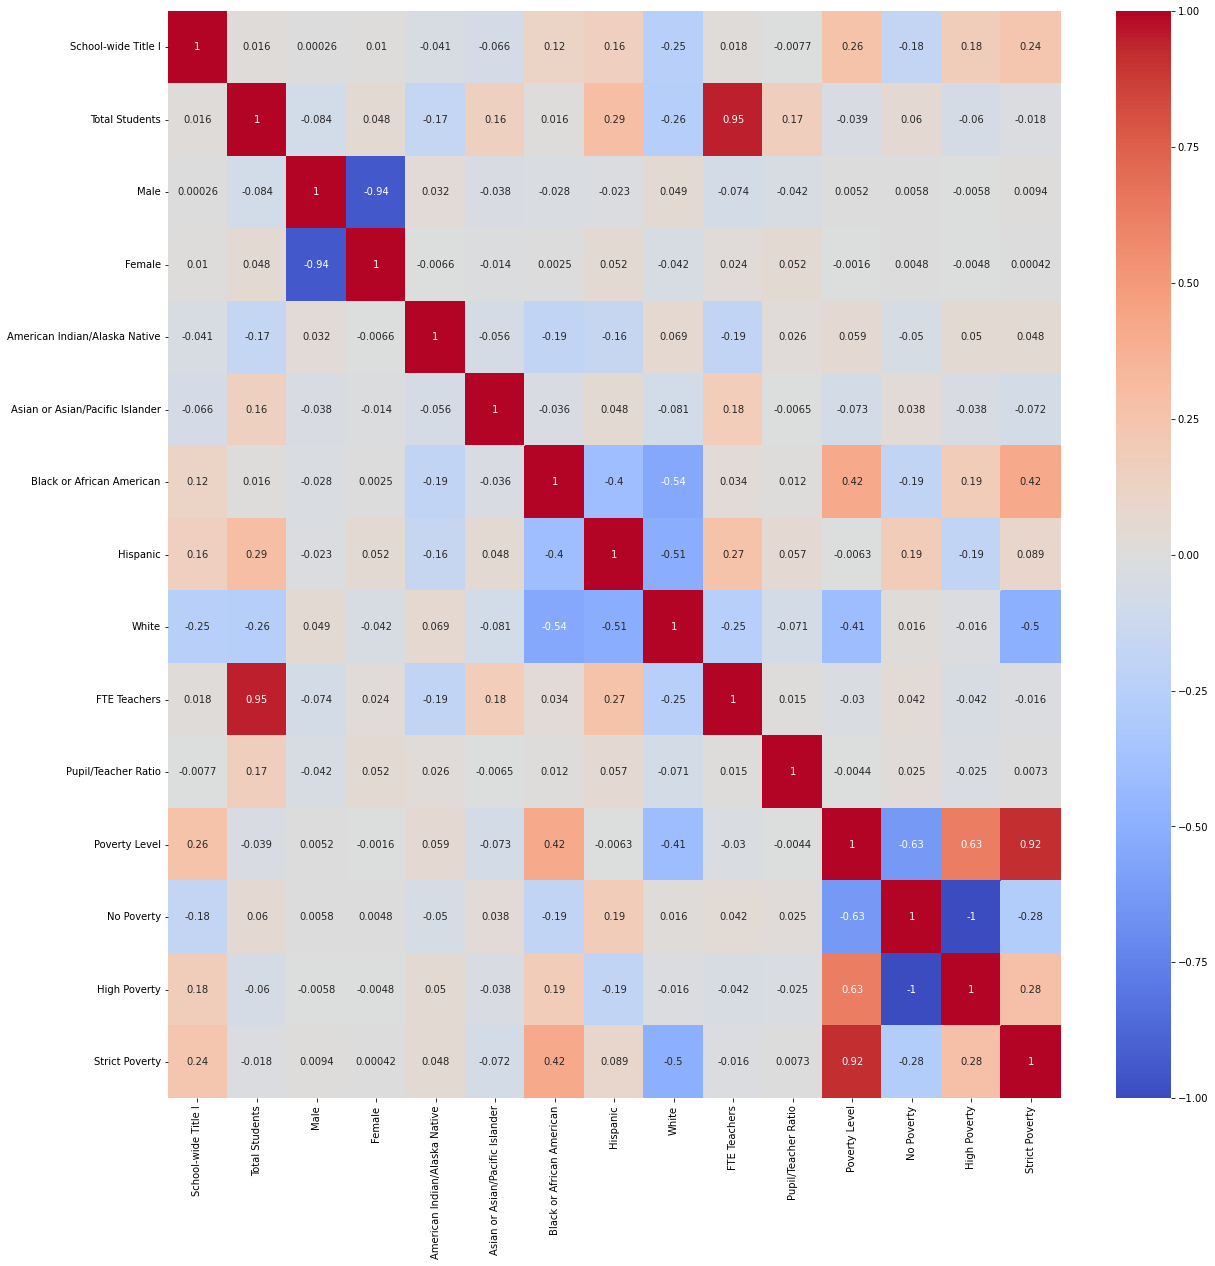

In [ ]:
plt.figure(figsize=(20,20))
corr_matrix = normalized_feature_selection.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

By looking at the correlation matrix, we can tell that School wide Title 1, Black or African American, Hispanic and White have some kind have a significant association with Poverty Level (HP and SP). However, we need to know exactly how many features to include our models. 

In [ ]:
y = normalized_feature_selection['Strict Poverty'].values
X = normalized_feature_selection.drop(['Poverty Level', 'No Poverty', 'High Poverty', 'Strict Poverty'], axis=1)

X_cols = X.columns

X = X.values

We can look at the chi-square scores to see what features are to be selected. We chose this test because we have only one dependent nominal variable two possible classes and multiple independent variables.

$\chi^{2}=\sum \frac{\left({O}_{i}-E_{i}\right)^{2}}{E_{i}}$

The chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification. `SelectKBest` removes all but the highest scoring features. `K` is the number of top features to select.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_features = SelectKBest(score_func=chi2, k='all').fit(X, y)

scores = pd.concat([pd.DataFrame(X_cols), pd.DataFrame(best_features.scores_)], axis=1)
scores.columns = ['Feature', 'Chi Score']
scores.sort_values(by=['Chi Score'], ascending=False, inplace=True)
print(scores)

                            Feature    Chi Score
8                             White  2524.332196
6         Black or African American  2427.114768
1                    Total Students  2241.792292
0               School-wide Title I   223.148934
7                          Hispanic   119.445179
9                      FTE Teachers   111.250211
4     American Indian/Alaska Native    29.838411
5   Asian or Asian/Pacific Islander    11.309898
10              Pupil/Teacher Ratio     4.199642
2                              Male     0.009215
3                            Female     0.000019


Now we investigate the appropiate number of features to select for our models.

`ExtraTreesClass` is an ensemble learning class that implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. `n_estimators` is the number of trees in the forest.. This approach is simple and highly interpretable.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

extra_tree_forest = ExtraTreesClassifier(n_estimators=100).fit(X, y)

selector = SelectFromModel(extra_tree_forest, prefit=True)

X_new = selector.transform(X)

print('Feature Importance: ', extra_tree_forest.feature_importances_)
print(X_new.shape)

Feature Importance:  [0.03432145 0.07294007 0.05877082 0.05843734 0.06603888 0.06887308
 0.17365691 0.09467572 0.23440463 0.07217589 0.0657052 ]
(38961, 3)


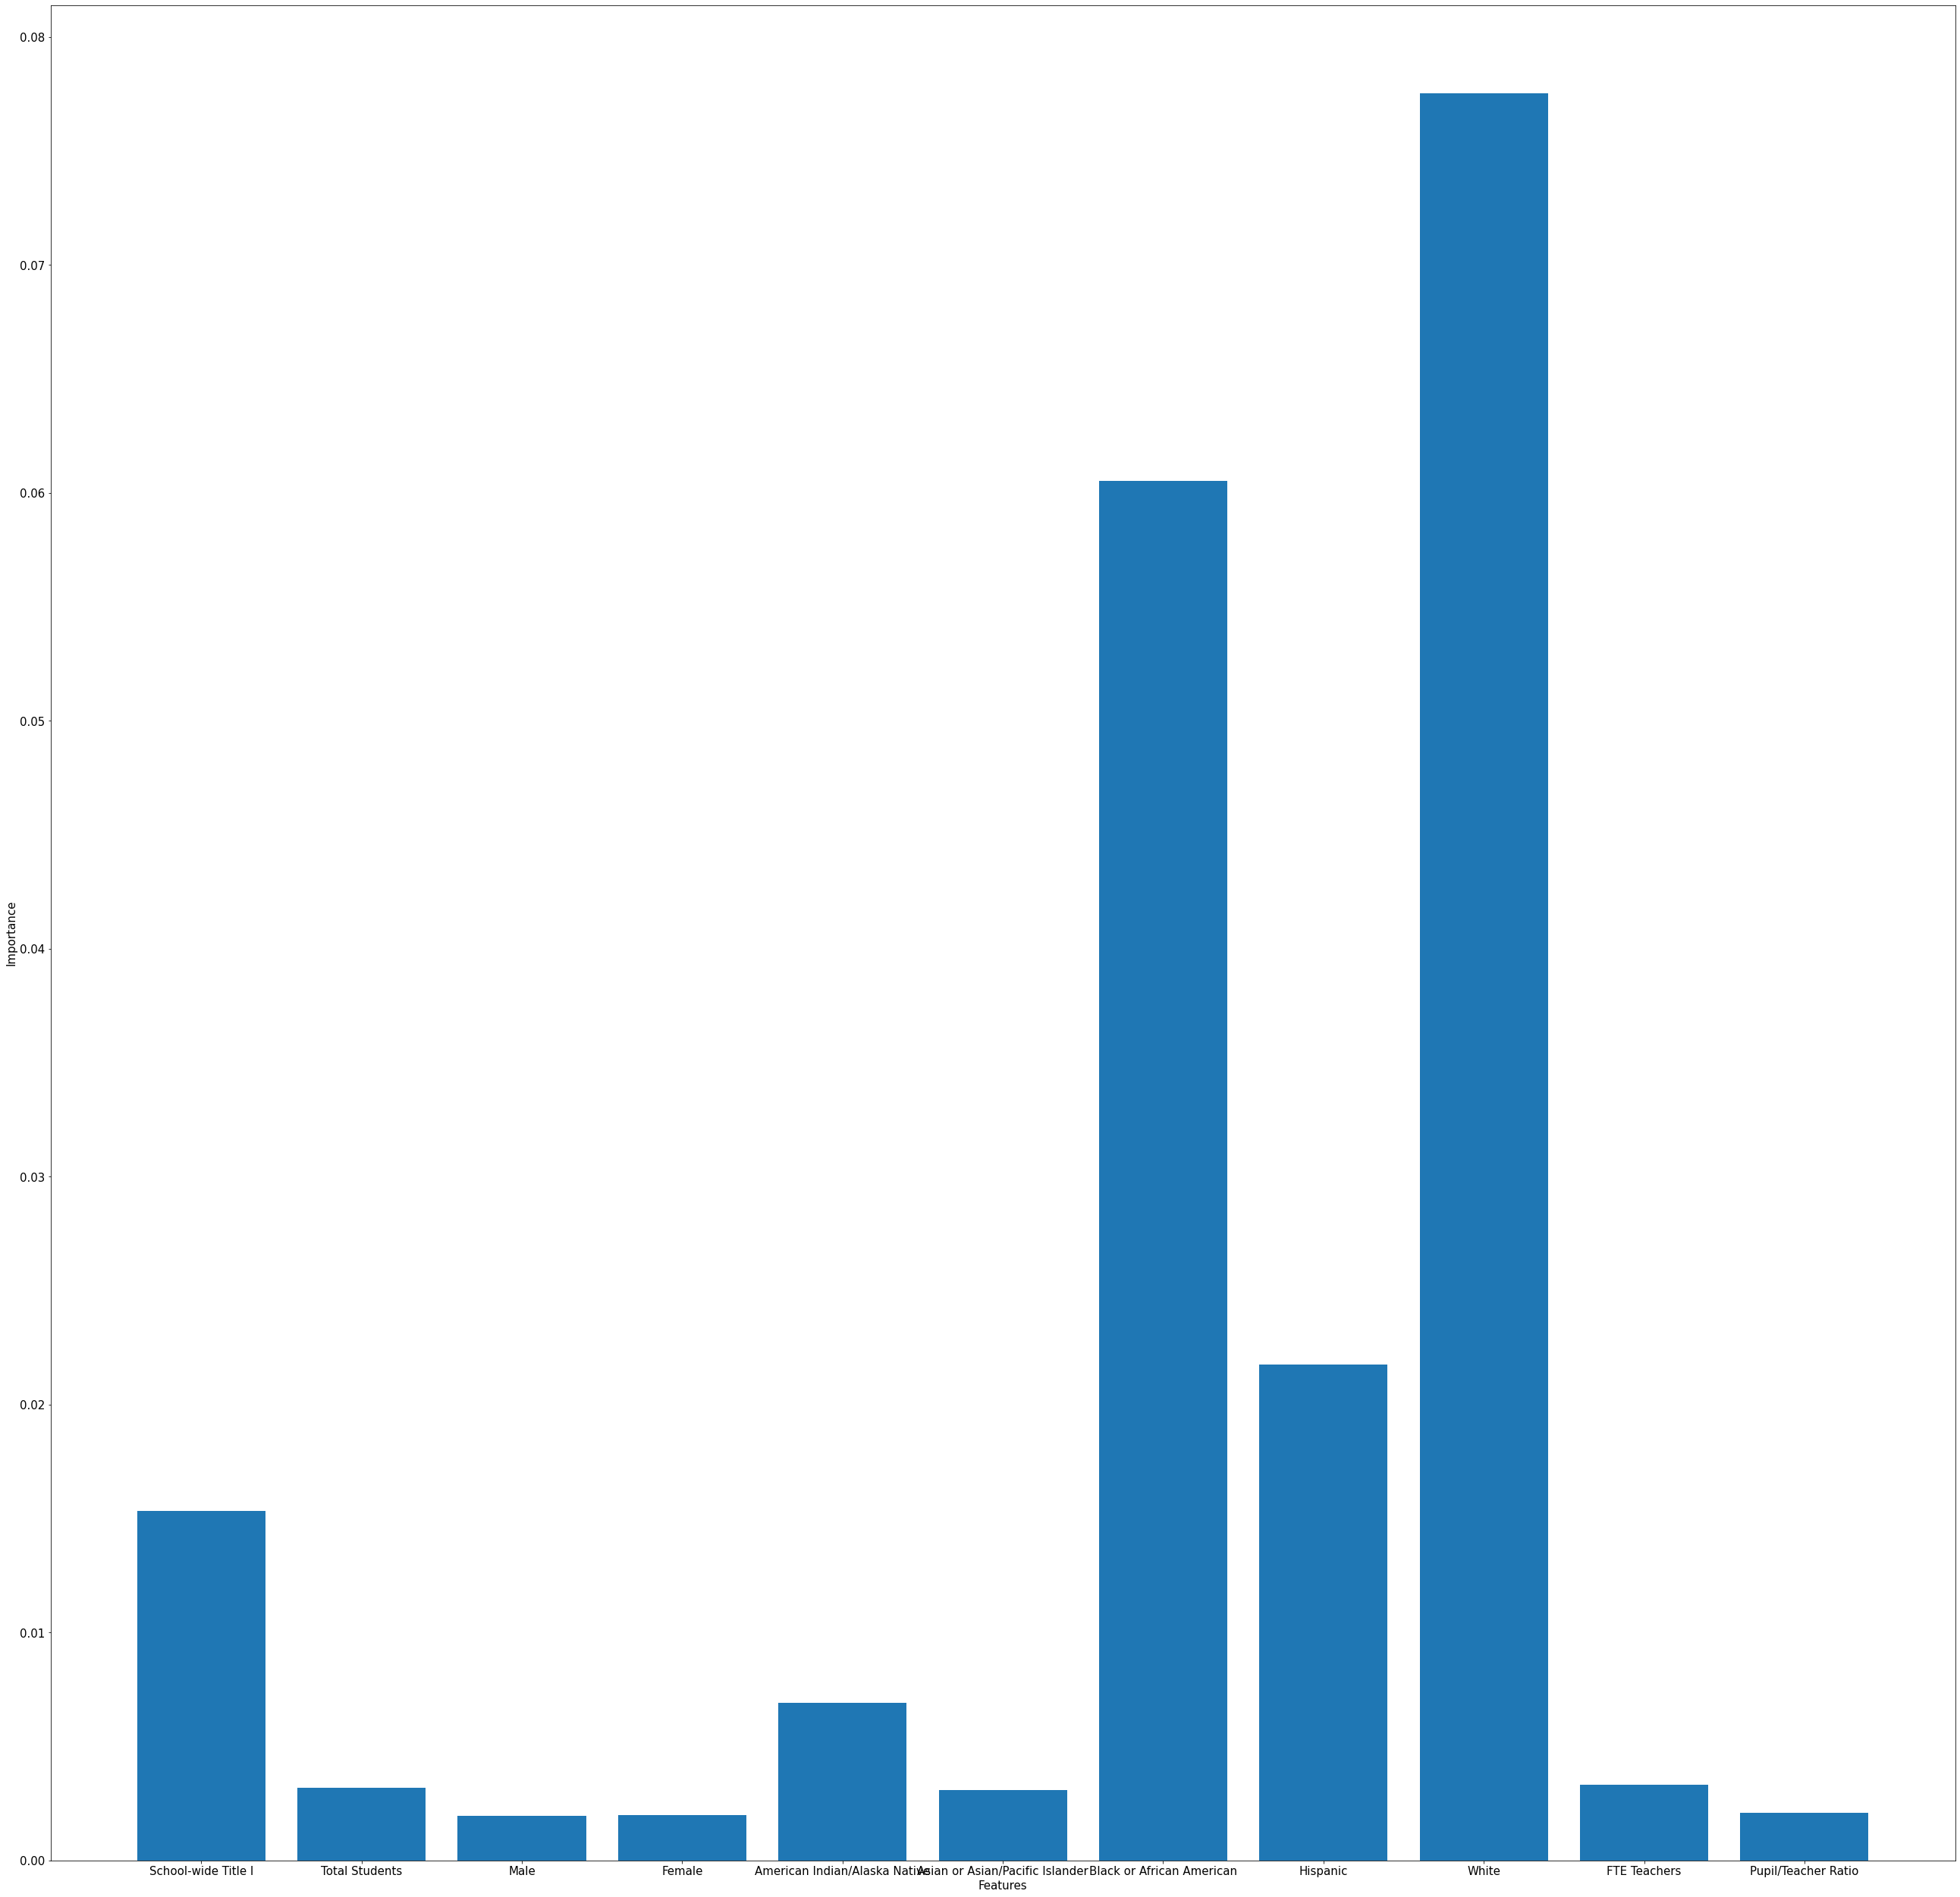

In [ ]:
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis=0)

plt.figure(figsize=(45, 45))
plt.rcParams.update({'font.size': 15})
plt.bar(X_cols, feature_importance_normalized)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

The number of features that will selected is 3. 

Based on our results, the 3 most significant features are 'Black or African American', 'Black or African American', 'White', and 'Hispanic'. 

In [ ]:
best_features = [
    'Black or African American',
    'Hispanic',
    'White'
]

### Exploratory Data Analysis

We generate some plots to better understand and its distribution. 

In [ ]:
def print_nan_rows(df):
    is_NaN = df.isnull()
    row_has_NaN = is_NaN.any(axis=1)
    rows_with_NaN = df[row_has_NaN]
    print(rows_with_NaN)

def schools_per_state(df):
    return df.set_index('School ID (NCES)').groupby('State Abbr')['State Abbr'].agg(['count']).reset_index()
    
def poverty_level_over_time(df):
    return df.pivot(index='School ID (NCES)', columns='Year', values='Poverty Level').dropna().mean()

def poverty_distribution(df):
    return df[['State Abbr', 'Strict Poverty']][df['Strict Poverty'] != 0].groupby('State Abbr')['State Abbr'].agg(['count']).reset_index()


#### Number of Schools per State

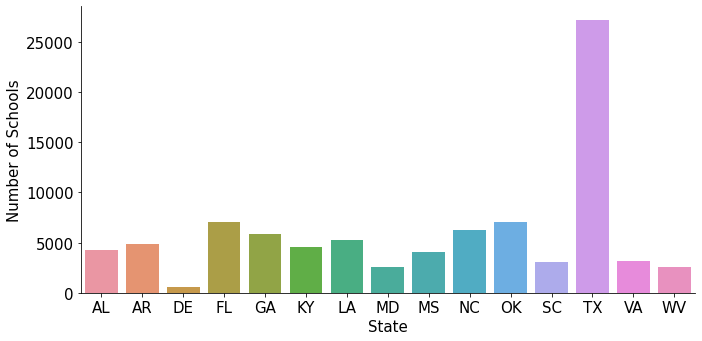

In [ ]:
df = schools_per_state(ground_truth)
df.columns = ['State', 'Number of Schools']
sns.catplot(x='State', y='Number of Schools', aspect=2, kind='bar', data=df)

#### Average Poverty over time

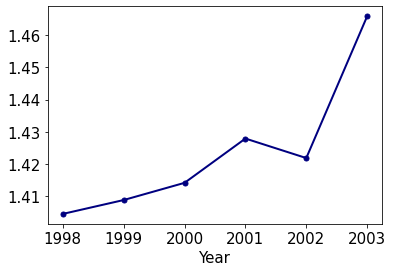

In [ ]:
df = poverty_level_over_time(ground_truth)
df.plot(lw=2, colormap='jet', marker='.', markersize=10)

This graph concurrs with ["Poverty Rates Fell in 2000, But Income Was Stagnant"](https://www.nytimes.com/2001/09/26/us/poverty-rates-fell-in-2000-but-income-was-stagnant.html) since Poverty Level here is based on Free and Reduced Lunch student proportion which is based on income.

#### Proportion of Strict Poverty Schools per State

  State  Number of Schools
0    AL               4282
1    AR               4827
2    DE                531
3    FL               7045
4    GA               5813
  State  Strict Poverty
0    AL            1904
1    AR            1436
2    DE              31
3    FL            4214
4    GA            2858


<BarContainer object of 15 artists>

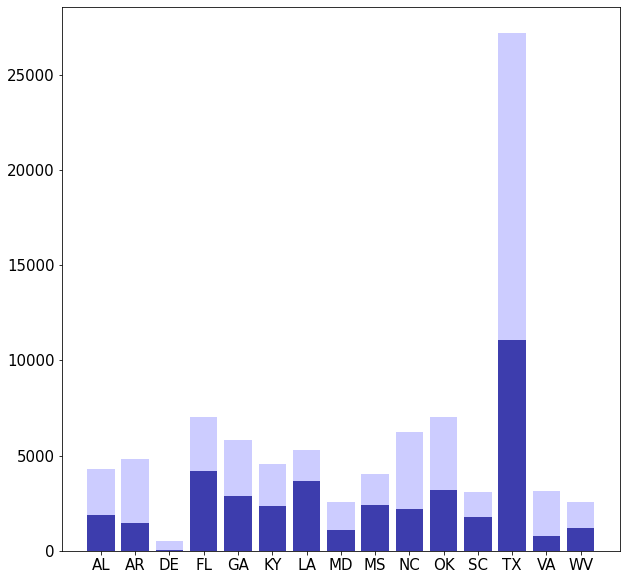

In [ ]:
df1 = schools_per_state(ground_truth)
df1.columns = ['State', 'Number of Schools']
df2 = poverty_distribution(ground_truth)
df2.columns = ['State', 'Strict Poverty']

print(df1.head())
print(df2.head())

plt.figure(figsize=(10,10))
plt.bar('State', 'Number of Schools', data=df1, color="blue", alpha=0.2, label="No Poverty")
plt.bar('State', 'Strict Poverty', data=df2, color="darkblue", alpha=0.7, label="Strict Poverty")

## Machine Learning Approaches

### Modeling

We will use 2007-2015 datasets for modeling.

In [ ]:
df2007 = pd.read_csv('2007-2008.csv', names=columns, header=3, skipfooter=5, engine='python')
df2007['Year'] = 2007
df2008 = pd.read_csv('2008-2009.csv', names=columns, header=3, skipfooter=5, engine='python')
df2008['Year'] = 2008
df2009 = pd.read_csv('2009-2010.csv', names=columns, header=3, skipfooter=5, engine='python')
df2009['Year'] = 2009
df2010 = pd.read_csv('2010-2011.csv', names=columns, header=3, skipfooter=5, engine='python')
df2010['Year'] = 2010 
df2011 = pd.read_csv('2011-2012.csv', names=columns, header=3, skipfooter=5, engine='python')
df2011['Year'] = 2011
df2012 = pd.read_csv('2012-2013.csv', names=columns, header=3, skipfooter=5, engine='python')
df2012['Year'] = 2012
df2013 = pd.read_csv('2013-2014.csv', names=columns, header=3, skipfooter=5, engine='python')
df2013['Year'] = 2013
df2014 = pd.read_csv('2014-2015.csv', names=columns, header=3, skipfooter=5, engine='python')
df2014['Year'] = 2014


modeling = pd.concat([df2007, df2008, df2009, df2010, df2011, df2012, df2013, df2014])

# Cleaning
clean(modeling)

# Normalization
normalize(modeling)

### **Predicting Strict Poverty**

We fit a combination of supervised machine learning algorithms, as they allows us to learn the model and find the most significant features for a dependent variable.

In [ ]:
from sklearn.model_selection import cross_val_score

y = modeling['Strict Poverty'].values
X = modeling[best_features].values

#### KNN

Because we are faced with a classification problem, we start with KNN as the baseline model due to its simplicity. It is a non-parametric method that does not make assumptions about the distribution of the data. The model uses Eucledian distance to compute classification from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point. KNN is effective here because of we have a small number of features and our dataset is dense, meaning we don't suffer from curse of dimensionality.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_sp = KNeighborsClassifier().fit(X, y)
best_k = 1
best_score = 0

for i in range(1, 11):
    knn_sp.set_params(n_neighbors=i).fit(X, y)
    print("K = {}".format(i))
    print(knn_sp.score(X, y))
    cv_score = cross_val_score(knn_sp, X, y, cv=5).mean()
    
    if cv_score > best_score:
        best_k = i
        best_score = cv_score
    
    print('CV ({}) Scores: '.format(5), cv_score)
    
knn_sp.set_params(n_neighbors=best_k).fit(X, y)
print("Best k: ", best_k)
print("Best CV score: ", best_score)

K = 1
0.992784424998476
CV (5) Scores:  0.6601530924198157
K = 2
0.8287991221604607
CV (5) Scores:  0.6675182391798586
K = 3
0.8313484036510145
CV (5) Scores:  0.6934157060871933
K = 4
0.7966892592120504
CV (5) Scores:  0.7017506944932482
K = 5
0.796523001723536
CV (5) Scores:  0.7098862819306925
K = 6
0.7824188247812328
CV (5) Scores:  0.7155500749492564
K = 7
0.7827624235908293
CV (5) Scores:  0.7183543255298198
K = 8
0.7751589144494383
CV (5) Scores:  0.7217293177494474
K = 9
0.7749981988772078
CV (5) Scores:  0.7235304809296218
K = 10
0.7699273454775192
CV (5) Scores:  0.72648429740119
Best k:  10
Best CV score:  0.72648429740119


#### Logistic Regression

We now try to assume a linear relationship between the variables and use logistic regression model as a method for binary classification. The model uses a sigmoid function to calculate the probability that an observation belongs to a certain class. Logistic regression is another simple model that allows us to predict a categorical dependent variable.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_sp = LogisticRegression().fit(X, y)
print(log_reg_sp.score(X, y))
print('CV ({}) Scores: '.format(5), cross_val_score(log_reg_sp, X, y, cv=5))

0.7251431199880295
CV (5) Scores:  [0.73742692 0.71279337 0.69688825 0.74298936 0.7339836 ]


#### SVM Classifier

The Simple Vector Classifier accepts a regularization parameter `C` and a `kernel` function (we'll choose linear). SVC creates a soft margin around the decision boundary that classifies an observation with a hyper-parametrized misclassification threshold. When the `C` argument is small, then the margins will be wide and many support vectors will be on the margin or will violate the margin. When the `C` argument is large, then the margins will be narrow and there will be few support vectors on the margin or violating the margin. LinearSVC minimizes squared hinge loss.

In [ ]:
from sklearn.svm import LinearSVC

# Default C = 1.0 and kernel is linear
svc_sp = LinearSVC().fit(X, y)
print(svc_sp.score(X, y))
print('CV ({}) Scores: '.format(5), cross_val_score(svc_sp, X, y, cv=5))

0.7253869643045172
CV (5) Scores:  [0.73842445 0.71307046 0.69752556 0.74179783 0.73514742]


#### Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. We sacrifice the interpretability of decision trees by combining many of these into a random forest model, which works well with large datasets while not being affected much by outliers. On the downside, we are not able to determine the degree of influence of features as effectively as in Logistic Regression for example.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_sp = RandomForestClassifier(n_estimators=50).fit(X, y)
print(random_forest_sp.score(X, y))
print('CV ({}) Scores: '.format(5), cross_val_score(random_forest_sp, X, y, cv=5))

0.9928564699101655
CV (5) Scores:  [0.73085982 0.71489928 0.70678046 0.73074152 0.72151408]


### Predicting High Poverty

In [ ]:
y = modeling['High Poverty'].values

In [ ]:
knn_hp = KNeighborsClassifier(n_neighbors=5).fit(X, y)
print('KNN HP Score: ', knn_hp.score(X, y))
print('CV ({}) Scores: '.format(5), cross_val_score(knn_hp, X, y, cv=5))

KNN HP Score:  0.9564516218418004
CV (5) Scores:  [0.95311591 0.95403031 0.9539749  0.94624252 0.94064509]


In [ ]:
log_reg_hp = LogisticRegression().fit(X, y)
print('Logistic Regression HP Score: ', log_reg_hp.score(X, y))
print('CV ({}) Scores: '.format(5), cross_val_score(log_reg_hp, X, y, cv=5))

Logistic Regression HP Score:  0.9539854690955039
CV (5) Scores:  [0.9539749  0.9539749  0.9539749  0.95400133 0.95400133]


In [ ]:
svc_hp = LinearSVC().fit(X, y)
print('Linear SVC HP Score: ', svc_hp.score(X, y))
print('CV ({}) Scores: '.format(5), cross_val_score(svc_hp, X, y, cv=5))

Linear SVC HP Score:  0.9539854690955039
CV (5) Scores:  [0.9539749  0.9539749  0.9539749  0.95400133 0.95400133]


In [ ]:
random_forest_hp = RandomForestClassifier(n_estimators=50).fit(X, y)
print('Random Forest HP Score: ', random_forest_hp.score(X, y))
print('CV ({}) Scores: '.format(5), cross_val_score(svc_hp, X, y, cv=5))

Random Forest HP Score:  0.9967746047228211
CV (5) Scores:  [0.9539749  0.9539749  0.9539749  0.95400133 0.95400133]


### Predicting School-wide Title I

In [ ]:
y = modeling['School-wide Title I'].values

In [ ]:
knn_t1 = KNeighborsClassifier(n_neighbors=5).fit(X, y)
print('KNN T1 Score: ', knn_t1.score(X, y))
print('CV ({}) Scores: '.format(5), cross_val_score(knn_t1, X, y, cv=5))

KNN T1 Score:  0.9288639625809813
CV (5) Scores:  [0.9199202  0.91734323 0.915459   0.91642651 0.91578918]


In [ ]:
log_reg_t1 = LogisticRegression().fit(X, y)
print('Logistic Regression T1 Score: ', log_reg_t1.score(X, y))
print('CV ({}) Scores: '.format(5), cross_val_score(log_reg_t1, X, y, cv=5))

Logistic Regression T1 Score:  0.9246521062052837
CV (5) Scores:  [0.92465848 0.92465848 0.92463077 0.9246564  0.9246564 ]


In [ ]:
svc_t1 = LinearSVC().fit(X, y)
print('Linear SVC T1 Score: ', svc_t1.score(X, y))
print('CV ({}) Scores: '.format(5), cross_val_score(svc_t1, X, y, cv=5))

Linear SVC T1 Score:  0.9246521062052837
CV (5) Scores:  [0.92465848 0.92465848 0.92463077 0.9246564  0.9246564 ]


In [ ]:
random_forest_t1 = RandomForestClassifier(n_estimators=50).fit(X, y)
print('Random Forest T1 Score: ', random_forest_t1.score(X, y))
print('CV ({}) Scores: '.format(5), cross_val_score(svc_t1, X, y, cv=5))

Random Forest T1 Score:  0.9985591017662088
CV (5) Scores:  [0.92465848 0.92465848 0.92463077 0.9246564  0.9246564 ]


### Model Selection

We will use 2015-2017 datasets for model selection

In [ ]:
df2015 = pd.read_csv('2015-2016.csv', names=columns, header=3, skipfooter=5, engine='python')
df2015['Year'] = 2015
df2016 = pd.read_csv('2016-2017.csv', names=columns, header=3, skipfooter=5, engine='python')
df2016['Year'] = 2016
df2017 = pd.read_csv('2017-2018.csv', names=columns, header=3, skipfooter=5, engine='python')
df2017['Year'] = 2017

model_selection = pd.concat([df2015, df2016, df2017])

# Cleaning
clean(model_selection)

# Normalization
normalize(model_selection)

X = model_selection[best_features].values

A measure like RSS is useful for evaluating and selecting an appropiate model in regression. For classification, we use other measures of success such as accuracy, precision, recall, F1 score, and similar.

In our case, ROC is also especially useful, as it allows for evaluating binary classification.

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score

def evaluate(clf, X, y, cv=5):
    y_pred = clf.predict(X)
    
    print(X.shape)
    print(y.shape)
    print(y_pred.shape)

    print('MSE: ', mean_squared_error(y, y_pred))
    
    cm = confusion_matrix(y, y_pred)
    fig, ax = plot_confusion_matrix(cm)
    plt.show()
    
    print(classification_report(y, y_pred))
    print('Accuracy Score: ', accuracy_score(y, y_pred))
    
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)
    print('Thresholds: ', thresholds)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#### Evaluating Strict Poverty

In [ ]:
y = model_selection['Strict Poverty'].values

(64090, 3)
(64090,)
(64090,)
MSE:  0.2784053674520206


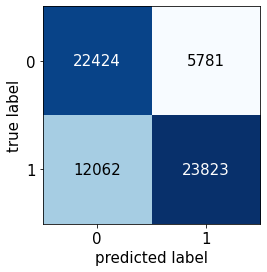

              precision    recall  f1-score   support

           0       0.65      0.80      0.72     28205
           1       0.80      0.66      0.73     35885

    accuracy                           0.72     64090
   macro avg       0.73      0.73      0.72     64090
weighted avg       0.74      0.72      0.72     64090

Accuracy Score:  0.7215946325479794
Thresholds:  [2 1 0]


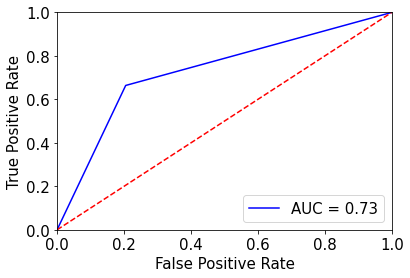

In [ ]:
evaluate(knn_sp, X, y, 5) 

(64090, 3)
(64090,)
(64090,)
MSE:  0.26428459978155716


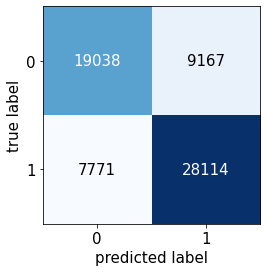

              precision    recall  f1-score   support

           0       0.71      0.67      0.69     28205
           1       0.75      0.78      0.77     35885

    accuracy                           0.74     64090
   macro avg       0.73      0.73      0.73     64090
weighted avg       0.73      0.74      0.73     64090

Accuracy Score:  0.7357154002184428
Thresholds:  [2 1 0]


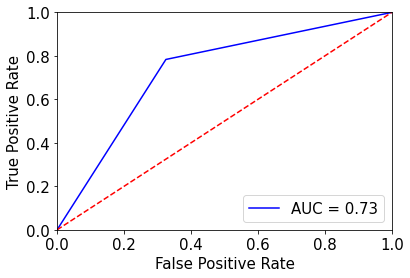

In [ ]:
evaluate(log_reg_sp, X, y, 5)

(64090, 3)
(64090,)
(64090,)
MSE:  0.26554844749570916


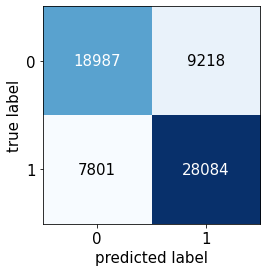

              precision    recall  f1-score   support

           0       0.71      0.67      0.69     28205
           1       0.75      0.78      0.77     35885

    accuracy                           0.73     64090
   macro avg       0.73      0.73      0.73     64090
weighted avg       0.73      0.73      0.73     64090

Accuracy Score:  0.7344515525042908
Thresholds:  [2 1 0]


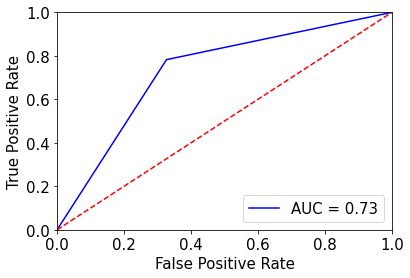

In [ ]:
evaluate(svc_sp, X, y, 5)

(64090, 3)
(64090,)
(64090,)
MSE:  0.2769542830394757


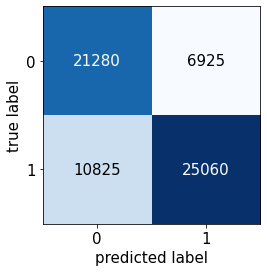

              precision    recall  f1-score   support

           0       0.66      0.75      0.71     28205
           1       0.78      0.70      0.74     35885

    accuracy                           0.72     64090
   macro avg       0.72      0.73      0.72     64090
weighted avg       0.73      0.72      0.72     64090

Accuracy Score:  0.7230457169605242
Thresholds:  [2 1 0]


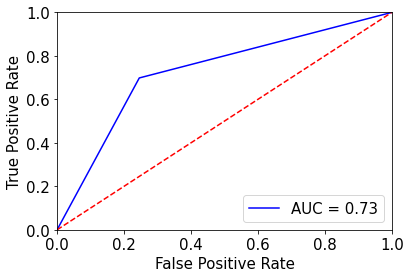

In [ ]:
evaluate(random_forest_sp, X, y, 5)

#### Evaluating High Poverty

In [ ]:
y = model_selection['High Poverty'].values

(64090, 3)
(64090,)
(64090,)
MSE:  0.06088313309408644


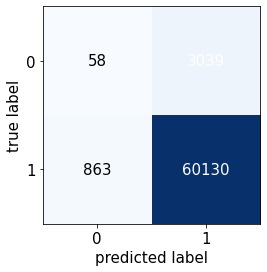

              precision    recall  f1-score   support

           0       0.06      0.02      0.03      3097
           1       0.95      0.99      0.97     60993

    accuracy                           0.94     64090
   macro avg       0.51      0.50      0.50     64090
weighted avg       0.91      0.94      0.92     64090

Accuracy Score:  0.9391168669059136
Thresholds:  [2 1 0]


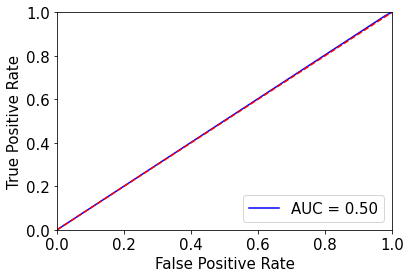

In [ ]:
evaluate(knn_hp, X, y, 5) 

(64090, 3)
(64090,)
(64090,)
MSE:  0.048322671243563736


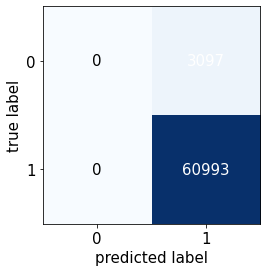

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3097
           1       0.95      1.00      0.98     60993

    accuracy                           0.95     64090
   macro avg       0.48      0.50      0.49     64090
weighted avg       0.91      0.95      0.93     64090

Accuracy Score:  0.9516773287564363
Thresholds:  [2 1]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


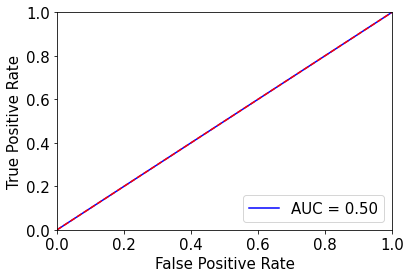

In [ ]:
evaluate(log_reg_hp, X, y, 5)

(64090, 3)
(64090,)
(64090,)
MSE:  0.048322671243563736


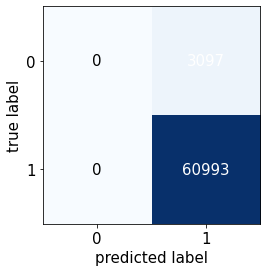

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3097
           1       0.95      1.00      0.98     60993

    accuracy                           0.95     64090
   macro avg       0.48      0.50      0.49     64090
weighted avg       0.91      0.95      0.93     64090

Accuracy Score:  0.9516773287564363
Thresholds:  [2 1]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


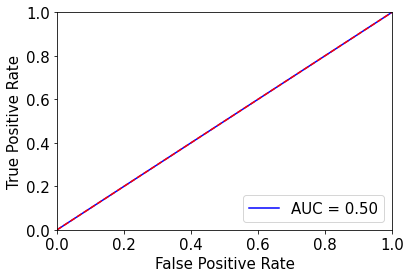

In [ ]:
evaluate(svc_hp, X, y, 5)

(64090, 3)
(64090,)
(64090,)
MSE:  0.05779372757060384


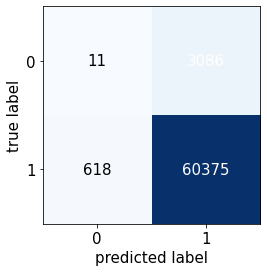

              precision    recall  f1-score   support

           0       0.02      0.00      0.01      3097
           1       0.95      0.99      0.97     60993

    accuracy                           0.94     64090
   macro avg       0.48      0.50      0.49     64090
weighted avg       0.91      0.94      0.92     64090

Accuracy Score:  0.9422062724293961
Thresholds:  [2 1 0]


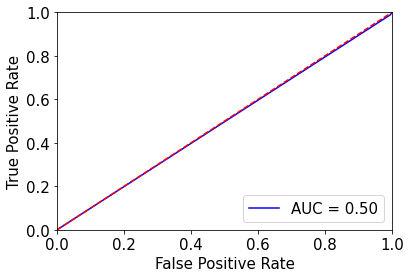

In [ ]:
evaluate(random_forest_hp, X, y, 5)

#### Evaluating School-wide Title I

In [ ]:
y = model_selection['School-wide Title I'].values

(64090, 3)
(64090,)
(64090,)
MSE:  0.0832579185520362


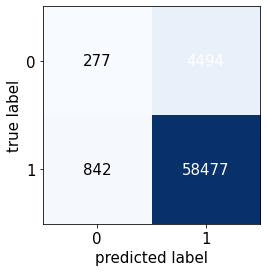

              precision    recall  f1-score   support

           0       0.25      0.06      0.09      4771
           1       0.93      0.99      0.96     59319

    accuracy                           0.92     64090
   macro avg       0.59      0.52      0.53     64090
weighted avg       0.88      0.92      0.89     64090

Accuracy Score:  0.9167420814479638
Thresholds:  [2 1 0]


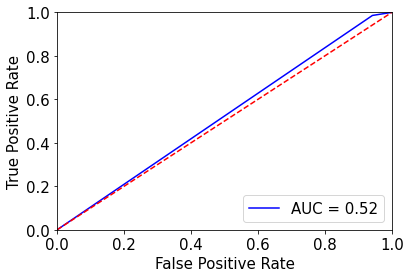

In [ ]:
evaluate(knn_t1, X, y, 5) 

(64090, 3)
(64090,)
(64090,)
MSE:  0.0744421906693712


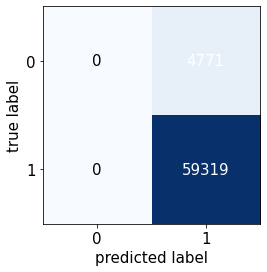

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4771
           1       0.93      1.00      0.96     59319

    accuracy                           0.93     64090
   macro avg       0.46      0.50      0.48     64090
weighted avg       0.86      0.93      0.89     64090

Accuracy Score:  0.9255578093306288
Thresholds:  [2 1]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


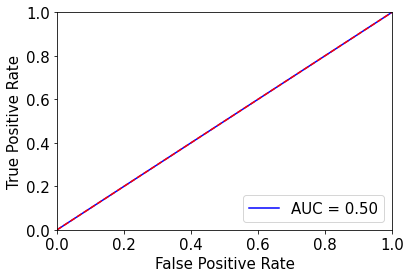

In [ ]:
evaluate(log_reg_t1, X, y, 5)

(64090, 3)
(64090,)
(64090,)
MSE:  0.0744421906693712


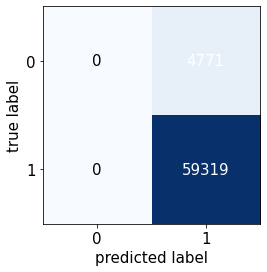

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4771
           1       0.93      1.00      0.96     59319

    accuracy                           0.93     64090
   macro avg       0.46      0.50      0.48     64090
weighted avg       0.86      0.93      0.89     64090

Accuracy Score:  0.9255578093306288


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Thresholds:  [2 1]


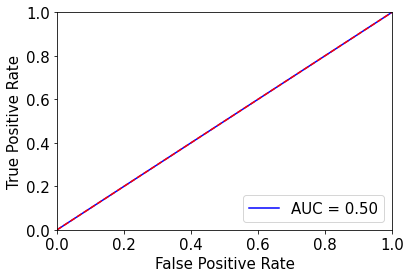

In [ ]:
evaluate(svc_t1, X, y, 5)

(64090, 3)
(64090,)
(64090,)
MSE:  0.0777344359494461


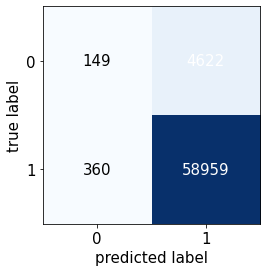

              precision    recall  f1-score   support

           0       0.29      0.03      0.06      4771
           1       0.93      0.99      0.96     59319

    accuracy                           0.92     64090
   macro avg       0.61      0.51      0.51     64090
weighted avg       0.88      0.92      0.89     64090

Accuracy Score:  0.9222655640505539
Thresholds:  [2 1 0]


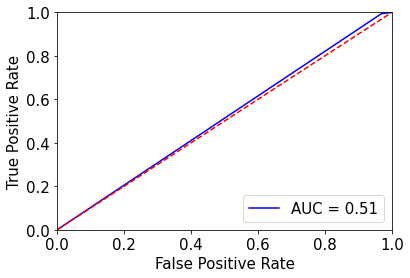

In [ ]:
evaluate(random_forest_t1, X, y, 5)

### Testing

We will use 2018-2019 datasets for testing

In [ ]:
df2018 = pd.read_csv('2018-2019.csv', names=columns, header=3, skipfooter=5, engine='python')
df2018['Year'] = 2018
df2019 = pd.read_csv('2019-2020.csv', names=columns, header=3, skipfooter=5, engine='python')
df2019['Year'] = 2019

testing = pd.concat([df2018, df2019])

# Cleaning
clean(testing)

# Normalization
normalize(testing)

y = testing['Strict Poverty'].values
X = testing[best_features].values

In the previous section, we selected the best-performing model. Now we evaluate it using previously unseen data. 

In [ ]:
print('Strict Poverty Prediction Errors:')
print(mean_squared_error(y, random_forest_sp.predict(X)))

y = testing['High Poverty'].values

print('High Poverty Prediction Errors:')
print(mean_squared_error(y, random_forest_hp.predict(X)))

y = testing['School-wide Title I'].values

print('School-wide Title I Prediction Errors:')
print(mean_squared_error(y, random_forest_t1.predict(X)))

Strict Poverty Prediction Errors:
0.2769628584861307
High Poverty Prediction Errors:
0.04464033850493653
School-wide Title I Prediction Errors:
0.05488951574988246


## Conclusions

Based on the mean squared error, the models perform very well on High Poverty Label, School-wide Title I labels. However, they do not do so well on the Strict Poverty label. Even though our models have high accuracy score, the score is still not sufficient to say that we have good models. As we look at the models' other scores like precision, recall, f1 scores. We can clearly see that the gap between the scores for each label (Strict Poverty vs No Strict Poverty...). The imbalance in classes cause our model to do very well at predicting at one label, but not other. 

Some of things we consider to better our models are:
*   Tuning the decision threshold
*   Gather more data for training
*   Adjust which and how many features we pick

At the end, we can clearly see that random forest scores (based on precision, recall, f1) are much better than the other 3 models. In conclusion, our best model is random forest for all 3 labels. (Strict Poverty, High Poverty, School-wide Title I). Some of the insights that we gains from the projects are: 

*  After feature selection process, we can confidently say that race is a huge factor in determining the strict poverty, high poverty, and school-wide title 1. 
*   We also notice that most of our datas are from Texas. So our model might not be the best at predicing the labels in the South Region, since the majority of our data is from Texas. 

## References

* https://www2.ed.gov/programs/titleiparta/index.html
* https://www.feedingamerica.org/take-action/advocate/federal-hunger-relief-programs/national-school-lunch-program
* https://www.studentdebtrelief.us/student-loans/title-1-schools/
* https://scikit-learn.org/stable/modules/classes.html
* https://nces.ed.gov/
* https://pandas.pydata.org/docs/
* https://numpy.org/doc/1.21/
* https://seaborn.pydata.org/
* https://matplotlib.org/3.5.0/index.html

## Appendix

Ian Roquebert
- Feature Selection
- Exploratory Data Analysis
- Testing
- Refactoring
- Git Workflow

Yessica Gaona
- Data Management
- Modeling
- Model Selection
- Abstract

James Helgren
- Feature Selection (Relegated)

Derek Nguyen
- Data Cleaning
- Feature Normalization
- Ground Truth Labeling
- Conclusion

In [ ]:
import matplotlib
import sklearn

print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)
print("Seaborn version: ", sns.__version__)
print("Matplotlib version: ", matplotlib.__version__)
print("Scikit Learn version: ", sklearn.__version__)

Pandas version:  1.1.5
Numpy version:  1.19.5
Seaborn version:  0.11.2
Matplotlib version:  3.2.2
Scikit Learn version:  1.0.1
